In [11]:
import pandas as pd
import re
import numpy as np
import scipy
import itertools
import matplotlib
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from collections import Counter
from random import choice
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

In [12]:
#Training Data
train_matrix = [] # Forming a 2D matrix to store all training feature vectors

#Test Data
test_matrix = [] # Forming a 2D matrix to store all test feature vectors

In [13]:
trained = pd.read_csv('Train_Clean.csv')#, nrows=20000
test = pd.read_csv('Test_Clean.csv')

In [14]:
trained['Lemmatized'].replace('', np.nan, inplace=True)
trained.dropna(subset=['Lemmatized'], inplace=True)

test['Lemmatized'].replace('', np.nan, inplace=True)
test.dropna(subset=['Lemmatized'], inplace=True)

Text(0, 0.5, 'No. of tweets')

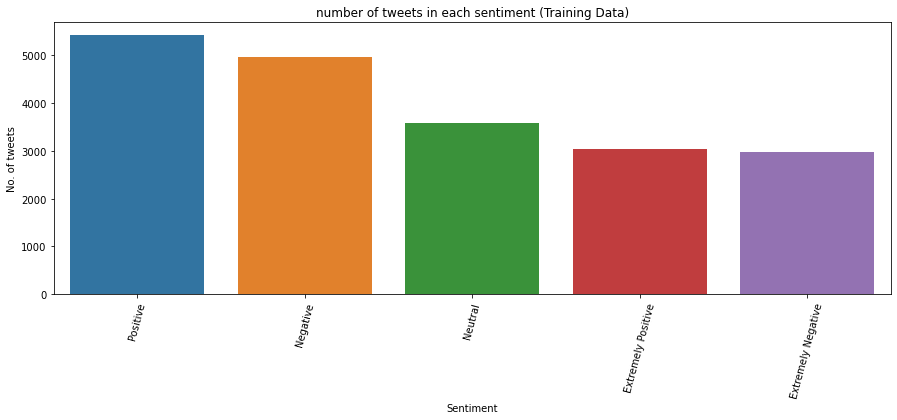

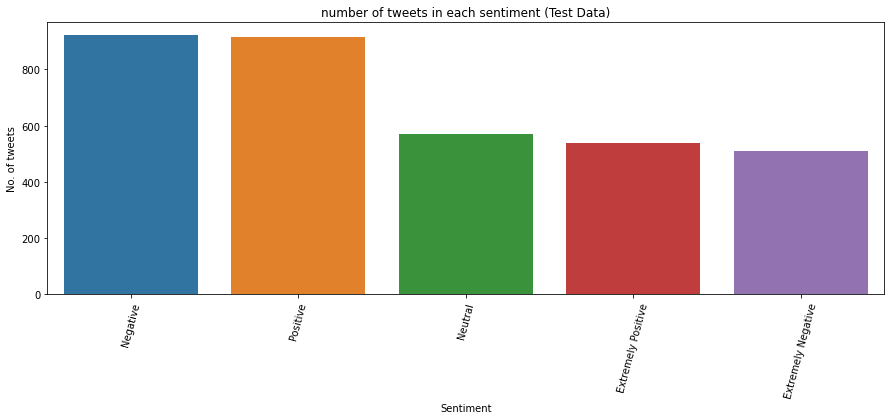

In [15]:
plt.figure(figsize=(15, 5))
highest_label = trained['Sentiment'].value_counts().index
sns.countplot(data=trained, x='Sentiment', order=highest_label)
plt.xticks(rotation=75)
plt.title('number of tweets in each sentiment (Training Data)')
plt.xlabel('Sentiment')
plt.ylabel('No. of tweets')

plt.figure(figsize=(15, 5))
highest_label = test['Sentiment'].value_counts().index
sns.countplot(data=test, x='Sentiment', order=highest_label)
plt.xticks(rotation=75)
plt.title('number of tweets in each sentiment (Test Data)')
plt.xlabel('Sentiment')
plt.ylabel('No. of tweets')

In [16]:
train_unique = (list(set(trained['Lemmatized'].str.findall("\w+").sum()))) # Finding all the unique words in training data's Tweet column
train_unique_words = len(train_unique)

In [17]:
#Training Data: Extracting features and storing them into the training feature matrix
for sentence in trained['Lemmatized']:
    train_featurevec = []
    word = sentence.split()
    for w in train_unique:
        train_featurevec.append(word.count(w))
    train_matrix.append(train_featurevec)

#Test Data: Extracting features and storing them into the test feature matrix
for sentence in test['Lemmatized']:
    test_featurevec = []
    word = sentence.split()
    for w in train_unique:
        test_featurevec.append(word.count(w))
    test_matrix.append(test_featurevec)



Confusion Matrix for k = 1 is:



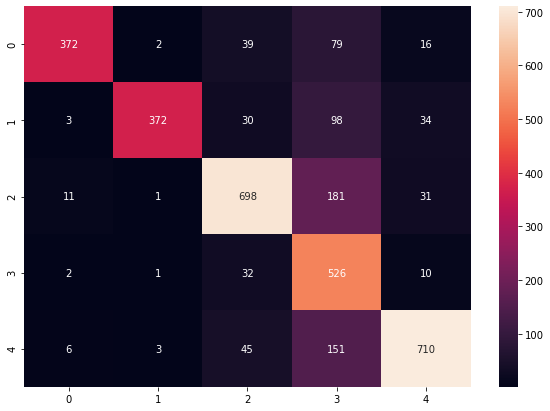

Accuracy Score for k = 1 is: 78.0%
Macroaveraged Recall for k = 1 is: 78.0%
Macroaveraged Precision for k = 1 is: 83.0%
Macroaveraged F1-score for k = 1 is: 78.0%


Confusion Matrix for k = 3 is:



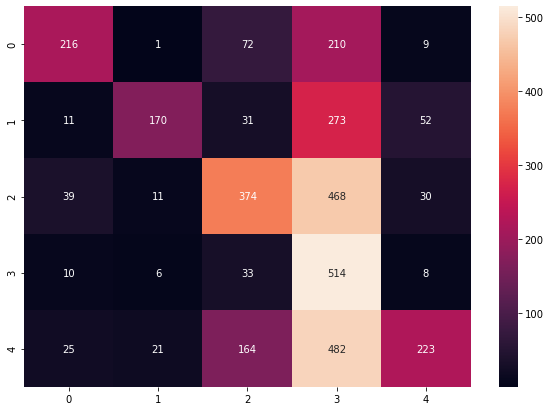

Accuracy Score for k = 3 is: 43.0%
Macroaveraged Recall for k = 3 is: 46.0%
Macroaveraged Precision for k = 3 is: 61.0%
Macroaveraged F1-score for k = 3 is: 45.0%


Confusion Matrix for k = 5 is:



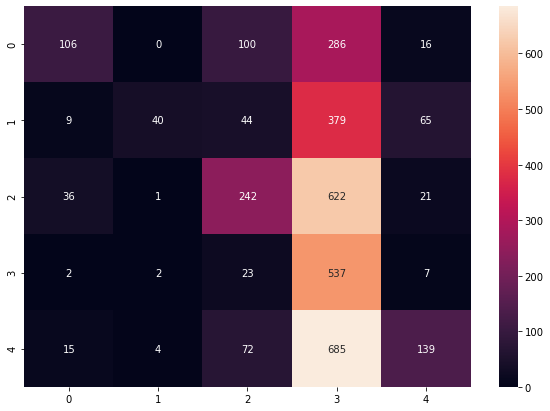

Accuracy Score for k = 5 is: 31.0%
Macroaveraged Recall for k = 5 is: 33.0%
Macroaveraged Precision for k = 5 is: 55.00000000000001%
Macroaveraged F1-score for k = 5 is: 28.000000000000004%


Confusion Matrix for k = 7 is:



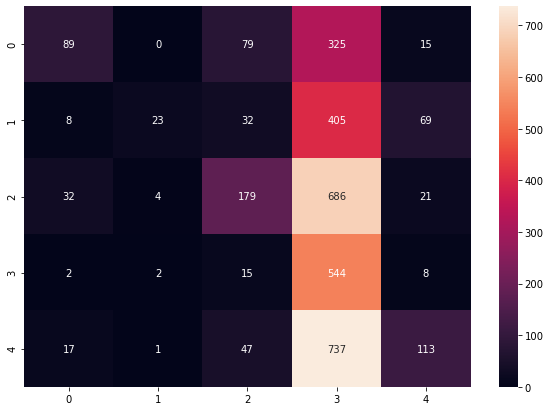

Accuracy Score for k = 7 is: 27.0%
Macroaveraged Recall for k = 7 is: 30.0%
Macroaveraged Precision for k = 7 is: 52.0%
Macroaveraged F1-score for k = 7 is: 23.0%


Confusion Matrix for k = 10 is:



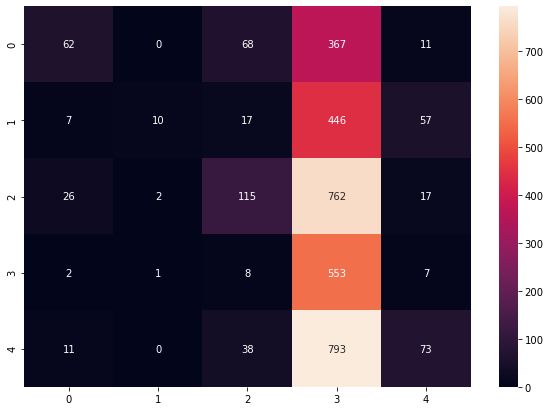

Accuracy Score for k = 10 is: 24.0%
Macroaveraged Recall for k = 10 is: 26.0%
Macroaveraged Precision for k = 10 is: 49.0%
Macroaveraged F1-score for k = 10 is: 18.0%


In [18]:
acc_list = []
rec_list = []
prec_list = []
f1_list = []

trainfeatures = train_matrix
testfeatures = test_matrix
X_train = trainfeatures #train_matrix - 2D feature vector
X_test = testfeatures #test_matrix - 2D feature vector
y_train = trained['Sentiment'] #trained['Sentiment]
y_test = test['Sentiment'] #test['Sentiment]

for k in [1,3,5,7,10]:
    classifier = KNeighborsClassifier(n_neighbors=k,algorithm='brute') #Using brute-force algorithm for quicker computation.
    classifier.fit(X_train, y_train) #Fitting the built-in sklearn classifier on our training data
    predicted_label = classifier.predict(X_test) #Making the classifier to predict on the previously unseen test data.
    accuracy_score = (metrics.accuracy_score(y_test,predicted_label))
    accuracy_score = (round(accuracy_score,2))*100
    acc_list.append(accuracy_score)

    confusion_mat = confusion_matrix(y_test, predicted_label)
    class_report = classification_report(y_test, predicted_label)

    macro_precision = (metrics.precision_score(y_test, predicted_label, average='macro'))
    macro_precision = (round(macro_precision,2))*100
    prec_list.append(macro_precision)

    macro_recall = (metrics.recall_score(y_test, predicted_label, average='macro'))
    macro_recall = (round(macro_recall,2))*100
    rec_list.append(macro_recall)
    
    macro_f1 = (metrics.f1_score(y_test, predicted_label, average='macro'))
    macro_f1 = (round(macro_f1,2))*100
    f1_list.append(macro_f1)

    print("\n\nConfusion Matrix for k = {} is:\n".format(k))
    #print(confusion_mat)
    plt.figure(figsize = (10,7))
    sns.heatmap(confusion_mat, annot=True, fmt='g')
    plt.show()
    #print("\nClassification Report for k = {} is:\n".format(k))
    #print(class_report)
    print("Accuracy Score for k = {0} is: {1}%".format(k,accuracy_score))
    print("Macroaveraged Recall for k = {0} is: {1}%".format(k,macro_recall))
    print("Macroaveraged Precision for k = {0} is: {1}%".format(k,macro_precision))
    print("Macroaveraged F1-score for k = {0} is: {1}%".format(k,macro_f1))

<function matplotlib.pyplot.show(close=None, block=None)>

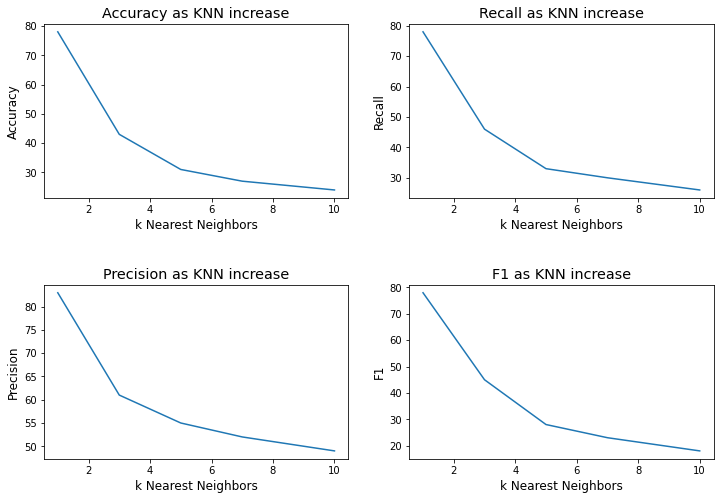

In [19]:
k_ls = [1,3,5,7,10] 

fig = plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt.plot(k_ls,acc_list)
plt.title("Accuracy as KNN increase",fontsize='x-large')
plt.xlabel("k Nearest Neighbors",fontsize='large')
plt.ylabel("Accuracy",fontsize='large')

plt.subplot(2,2,2)
plt.plot(k_ls,rec_list)
plt.title("Recall as KNN increase",fontsize='x-large')
plt.xlabel("k Nearest Neighbors",fontsize='large')
plt.ylabel("Recall",fontsize='large')

plt.subplot(2,2,3)
plt.plot(k_ls,prec_list)
plt.title("Precision as KNN increase",fontsize='x-large')
plt.xlabel("k Nearest Neighbors",fontsize='large')
plt.ylabel("Precision",fontsize='large')

plt.subplot(2,2,4)
plt.plot(k_ls,f1_list)
plt.title("F1 as KNN increase",fontsize='x-large')
plt.xlabel("k Nearest Neighbors",fontsize='large')
plt.ylabel("F1",fontsize='large')

fig.subplots_adjust(hspace=.5)

plt.show